In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv("Packages.csv")

In [23]:
df.head()

,From_Date,To_Date,From_Place,To_Place,No_of_Person,Vehicle_Types,Cost
0,04-10-2024,30-12-2024,Nandyal,Nagari,1,Train,799
1,15-10-2024,22-11-2024,Hindupur,Nagari,1,Bus,834
2,20-11-2024,01-12-2024,Salem,Visakhapatnam,4,Bus,835
3,03-11-2024,18-11-2024,Nellore,Hindupur,1,Bus,942
4,01-10-2024,06-11-2024,Palakollu,Ongole,4,Train,778


In [24]:
df.tail()

,From_Date,To_Date,From_Place,To_Place,No_of_Person,Vehicle_Types,Cost
5200,06-11-2024,09-11-2024,Madanapalle,Thoothukudi,5,Car,756
5201,10-11-2024,28-11-2024,Nagapattinam,Ongole,5,Train,997
5202,26-12-2024,30-12-2024,Mettur,Puttur,5,Car,856
5203,06-10-2024,09-10-2024,Mudhaliarpet,Nandyal,1,Train,946
5204,21-10-2024,13-12-2024,Ramanathapuram,Vijayawada,4,Car,872


In [25]:
df['Vehicle_Types'].value_counts()

,count
Vehicle_Types,
Bus,2590
Train,1340
Car,1275


In [26]:
df.isnull().sum()

,0
From_Date,0
To_Date,0
From_Place,0
To_Place,0
No_of_Person,0
Vehicle_Types,0
Cost,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   From_Date      5205 non-null   object
 1   To_Date        5205 non-null   object
 2   From_Place     5205 non-null   object
 3   To_Place       5205 non-null   object
 4   No_of_Person   5205 non-null   int64 
 5   Vehicle_Types  5205 non-null   object
 6   Cost           5205 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 284.8+ KB


In [28]:
df.describe()

,No_of_Person,Cost
count,5205.000000,5205.000000
mean,3.021134,868.081652
std,1.433088,80.353741
min,1.000000,699.000000
25%,2.000000,802.000000
50%,3.000000,858.000000
75%,4.000000,923.000000
max,5.000000,1077.000000


In [29]:
df.columns

Index(['From_Date', 'To_Date', 'From_Place', 'To_Place', 'No_of_Person',
       'Vehicle_Types', 'Cost'],
      dtype='object')

In [30]:
X = df[['From_Date', 'To_Date', 'From_Place', 'To_Place', 'No_of_Person','Vehicle_Types']]
y = df['Cost']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
numeric_features = ['No_of_Person']
categorical_features = ['From_Date', 'To_Date', 'From_Place', 'To_Place','Vehicle_Types']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN = Pipeline(steps=[('preprocessor', preprocessor),
                        ('Regressor', KNeighborsClassifier() )])
KNN.fit(X_train, y_train)

# Predict on the test set
y_pred = KNN.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
KNN_score=int(accuracy * 100)
# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9125840537944284
Precision: 0.9428977522637465
Recall: 0.9125840537944284
F1 Score: 0.9080271538083842


In [34]:
from sklearn.naive_bayes import MultinomialNB

# Define the pipeline with MultinomialNB (Naive Bayes)
NB_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', MultinomialNB())])

# Fit the model
NB_model.fit(X_train, y_train)

# Predict on the test set
y_pred = NB_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
NB_score = int(accuracy * 100)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.6791546589817483
Precision: 0.7457970486333901
Recall: 0.6791546589817483
F1 Score: 0.6545985038884654


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Define the pipeline with DecisionTreeClassifier
DT_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=42))])

# Fit the model
DT_model.fit(X_train, y_train)

# Predict on the test set
y_pred = DT_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
DT_score = int(accuracy * 100)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9903938520653218
Precision: 0.9952454419313209
Recall: 0.9903938520653218
F1 Score: 0.9898406391032261


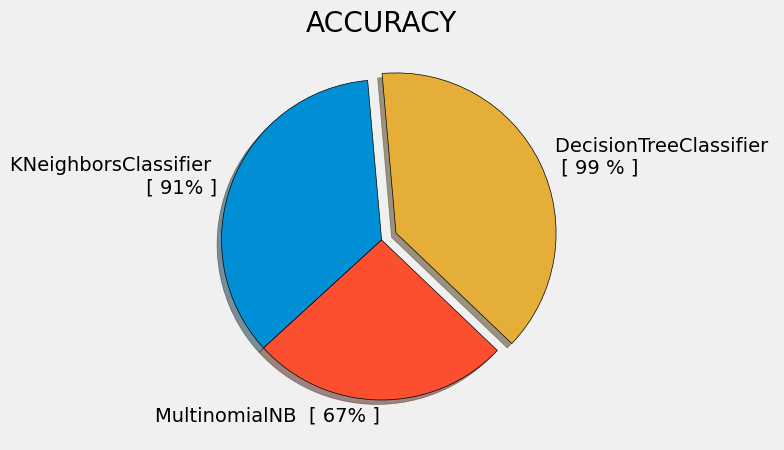

In [36]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Language Popularity
#python is not good with a lot of data so we shall modify our list to top 5 languages.
slices = [KNN_score, NB_score, DT_score]
labels = [f'KNeighborsClassifier \n [ {KNN_score}% ]',f'MultinomialNB  [ {NB_score}% ]',f'DecisionTreeClassifier \n [ {DT_score} % ]']
explode = [0,0, 0.1] #this puts an emphasis on python

plt.pie(slices, labels = labels, explode = explode,
        #shadow = True for asthetics to add a shadow to our plot
        shadow = True,
        #startangle = 90, rotates the original chart by 90 degress
        startangle = 95,
        wedgeprops = {'edgecolor': 'black'})



plt.title('ACCURACY')
plt.tight_layout()
plt.show()

In [37]:
df

,From_Date,To_Date,From_Place,To_Place,No_of_Person,Vehicle_Types,Cost
0,04-10-2024,30-12-2024,Nandyal,Nagari,1,Train,799
1,15-10-2024,22-11-2024,Hindupur,Nagari,1,Bus,834
2,20-11-2024,01-12-2024,Salem,Visakhapatnam,4,Bus,835
3,03-11-2024,18-11-2024,Nellore,Hindupur,1,Bus,942
4,01-10-2024,06-11-2024,Palakollu,Ongole,4,Train,778
...,...,...,...,...,...,...,...
5200,06-11-2024,09-11-2024,Madanapalle,Thoothukudi,5,Car,756
5201,10-11-2024,28-11-2024,Nagapattinam,Ongole,5,Train,997
5202,26-12-2024,30-12-2024,Mettur,Puttur,5,Car,856
5203,06-10-2024,09-10-2024,Mudhaliarpet,Nandyal,1,Train,946


In [38]:
# Assume 'new_data' is a dictionary or a single-row DataFrame with the input values
new_data = {'From_Date': '04-10-2024',
            'To_Date': '30-12-2024',
            'From_Place': 'Nandyal',
            'To_Place':'Nagari',
            'No_of_Person': 1,
            'Vehicle_Types': 'Train'
           }

# Create a DataFrame from the input data
new_df = pd.DataFrame([new_data])

# Use the trained model to make predictions
prediction = DT_model.predict(new_df)

print('Cost:','Rs.',prediction[0])


Cost: Rs. 799


In [39]:
# Assume 'new_data' is a dictionary or a single-row DataFrame with the input values
new_data = {'From_Date': '26-11-2024',
            'To_Date': '09-12-2024',
            'From_Place': 'Tiruchirappalli',
            'To_Place':'Chennai',
            'No_of_Person': 2,
            'Vehicle_Types': 'Bus'
           }

# Create a DataFrame from the input data
new_df = pd.DataFrame([new_data])

# Use the trained model to make predictions
prediction = DT_model.predict(new_df)

print('Cost:','Rs.',prediction[0])


Cost: Rs. 883


In [40]:
import pickle
# Dump the trained DT classifier with Pickle
DT_filename = 'DT.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(DT_model, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()